# Machine Learning Regression Model

## Load the data

In [30]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,-1.549143,DOWN
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,-0.321692,DOWN
...,...,...,...,...,...,...,...
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700,-2.634307,DOWN
2023-03-14,256.750000,261.070007,255.860001,260.790009,33620300,-1.751806,DOWN


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [31]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

### Compute the model

The following model will predict the **numerical increase** of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

In [32]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeRegressor(max_depth=15)

### Visualize the model

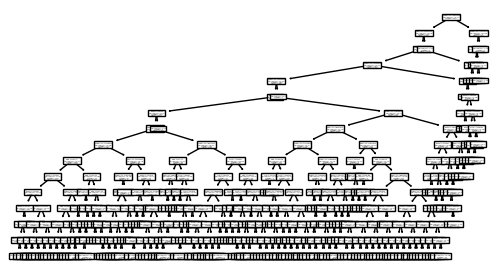

In [33]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [34]:
y_pred = model_dt.predict(X=explanatory)
df_predictions = df[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2016-12-08,-1.549143,-0.081910
2016-12-09,-0.321692,-0.264195
...,...,...
2023-03-13,-2.634307,-2.634307
2023-03-14,-1.751806,-0.759633


### Evaluate the model: compare predictions with the reality

In [35]:
error = df_predictions.change_tomorrow - df_predictions.prediction
error.sum().round(2)

0.0

In [36]:
error_squared = error**2
error_squared.sum()

2416.6520681838147

In [37]:
error_squared.mean()

1.534382265513533

In [38]:
error_squared_mean = error_squared.mean()
error_squared_mean

1.534382265513533

In [39]:
import numpy as np

rmse = np.sqrt(error_squared_mean)
rmse

1.238701846900025

In [40]:
error.std()

1.2390952729372282

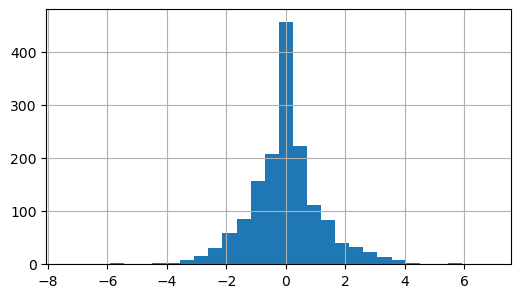

In [41]:
error.hist(bins=30);

The Standard Deviation of the Error|The Normal Distribution
-|-
![](src/std.png) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png)

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [42]:
import pickle

In [43]:
with open('models/model_dt_microsoft_linkedin_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)